# Importing libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
data  = pd.read_csv("C:/Users/USER/Desktop/zomato.csv")

In [36]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [41]:
data.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [14]:
data.shape

(51717, 17)

In [43]:
data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [45]:
data.duplicated().sum()

0

## EDA 

In [52]:
data.dropna(subset = ["rate","location","cuisines","phone"],inplace = True)

In [58]:
# dropping irrelavant columns
data.drop(['url', 'address', 'phone', 'menu_item'],axis=1, errors='ignore', inplace=True)

In [60]:
# Renaming columns
data.rename(columns={
    'approx_cost(for two people)': 'approxcost_two',
    'listed_in(type)': 'restaurant_type',
    'listed_in(city)': 'city'
}, inplace=True)

In [62]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approxcost_two,reviews_list,restaurant_type,city
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [64]:
data.columns = data.columns.str.strip()

In [66]:
# clean rate column
data['rate'] = data['rate'].replace(['NEW', '-'], np.nan)
data['rate'] = data['rate'].str.replace('/5', '', regex=False)
data['rate'] = data['rate'].astype(float)

In [68]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approxcost_two,reviews_list,restaurant_type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [72]:
data.dropna(subset=[ 'approxcost_two'], inplace=True)

In [74]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)

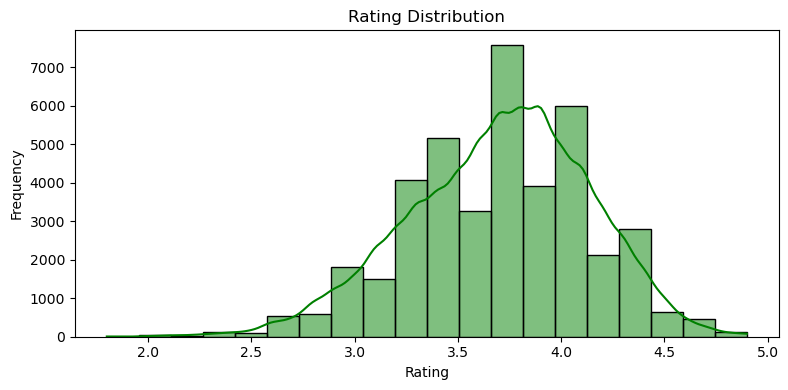

In [76]:
#Rating distribution
plt.figure(figsize=(8, 4))
sns.histplot(data['rate'].dropna(), bins=20, kde=True, color='green')
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

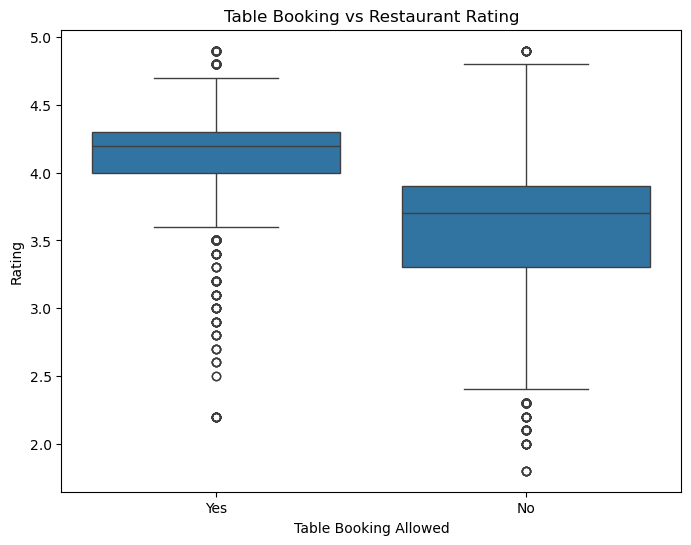

In [78]:
# Table Booking vs rating
plt.figure(figsize=(8,6))
sns.boxplot(x='book_table', y='rate', data=data)
plt.title('Table Booking vs Restaurant Rating')
plt.xlabel('Table Booking Allowed')
plt.ylabel('Rating')
plt.show()

# Higher Median Rating for 'Yes':

  1.Restaurants that allow table bookings tend to have higher median ratings (around 4.2).

  2.Restaurants without table booking have a lower median rating (around 3.7).

# Tighter Interquartile Range (IQR) for 'Yes':

  Ratings are more consistent for restaurants with table booking.

  Wider spread for 'No' indicates more variability in ratings.

# Outliers:

Some low-rated restaurants exist in both categories, especially more frequent among the "No" category.

## Top 10 Restaurant Location in Bengaluru

C:\Users\USER\AppData\Local\Temp\ipykernel_17540\2044435895.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='location', data=data, order=data['location'].value_counts().index[:10], palette='viridis')


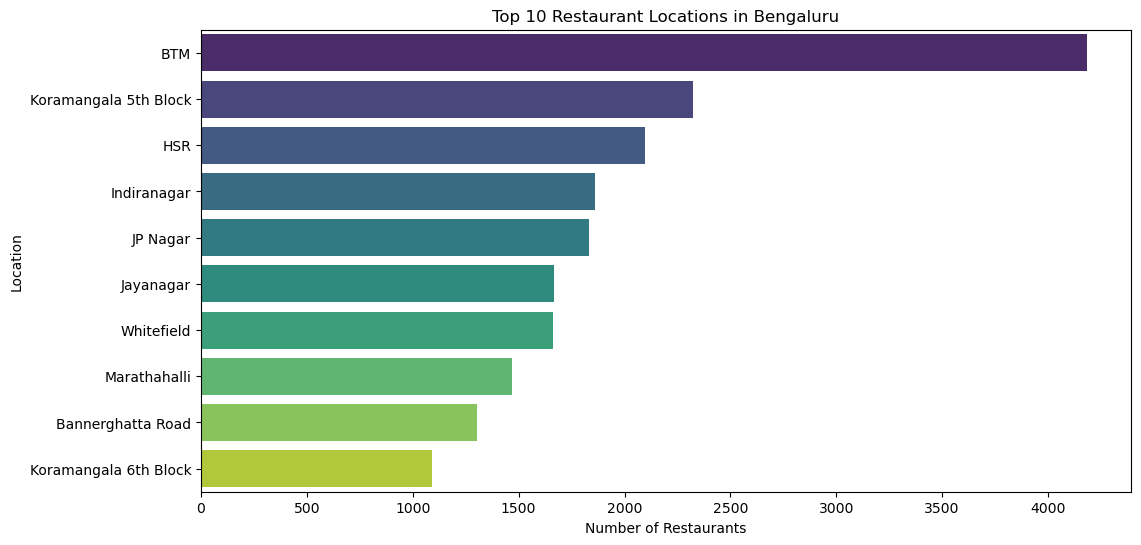

In [83]:
plt.figure(figsize=(12,6))
sns.countplot(y='location', data=data, order=data['location'].value_counts().index[:10], palette='viridis')
plt.title('Top 10 Restaurant Locations in Bengaluru')
plt.xlabel('Number of Restaurants')
plt.ylabel('Location')
plt.show()

## Location by rating distribution

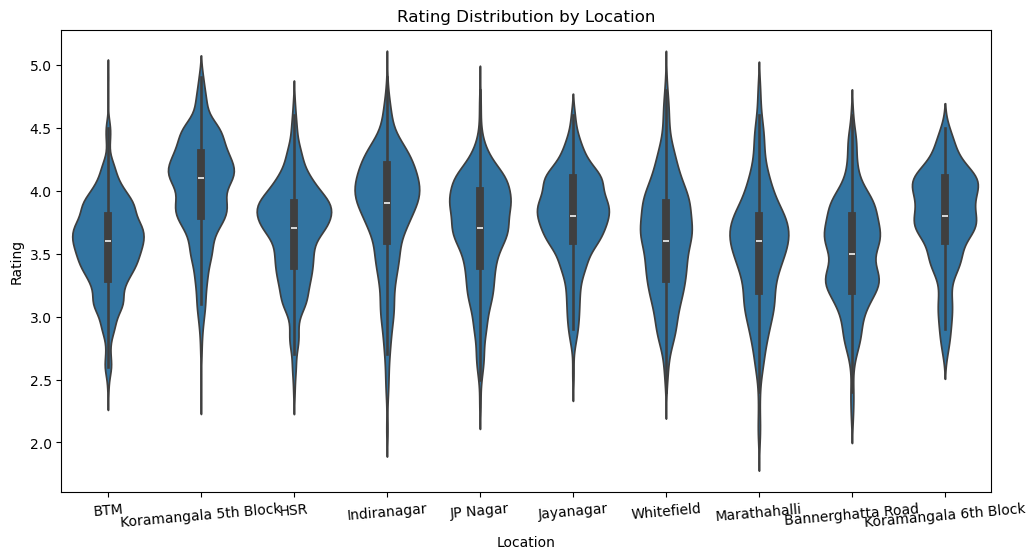

In [88]:
plt.figure(figsize=(12,6))
sns.violinplot(x='location', y='rate', data=data, order=data['location'].value_counts().index[:10])
plt.title('Rating Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Rating')
plt.xticks(rotation=5)
plt.show()

# Online order 

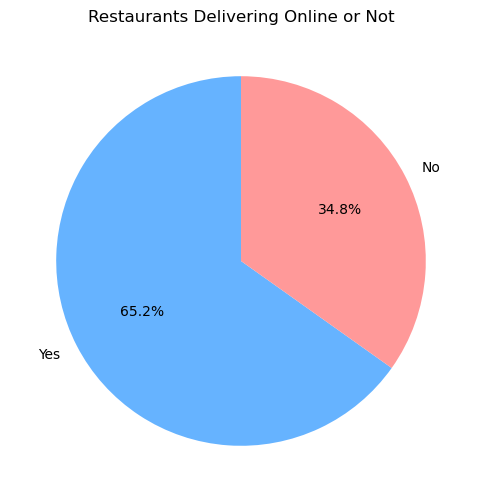

In [91]:
online_counts = data['online_order'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(online_counts, labels=online_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Restaurants Delivering Online or Not')
plt.show()

# Cost vs Rating


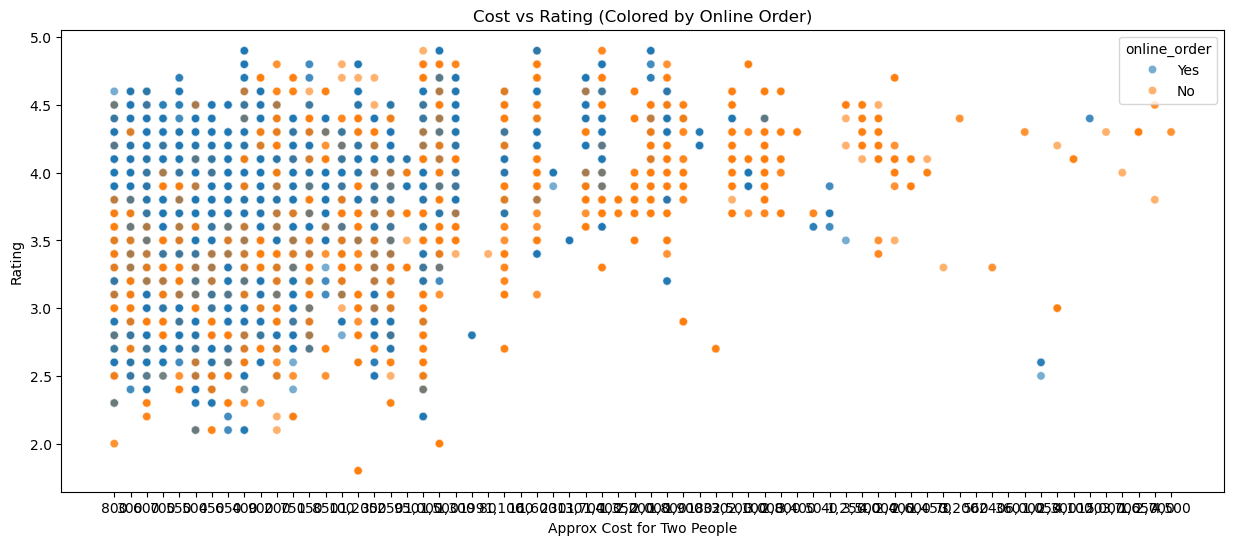

In [98]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='approxcost_two', y='rate', hue='online_order', data=data, alpha=0.6)
plt.title('Cost vs Rating (Colored by Online Order)')
plt.xlabel('Approx Cost for Two People')
plt.ylabel('Rating')
plt.show()

# Restaurant type and Rating


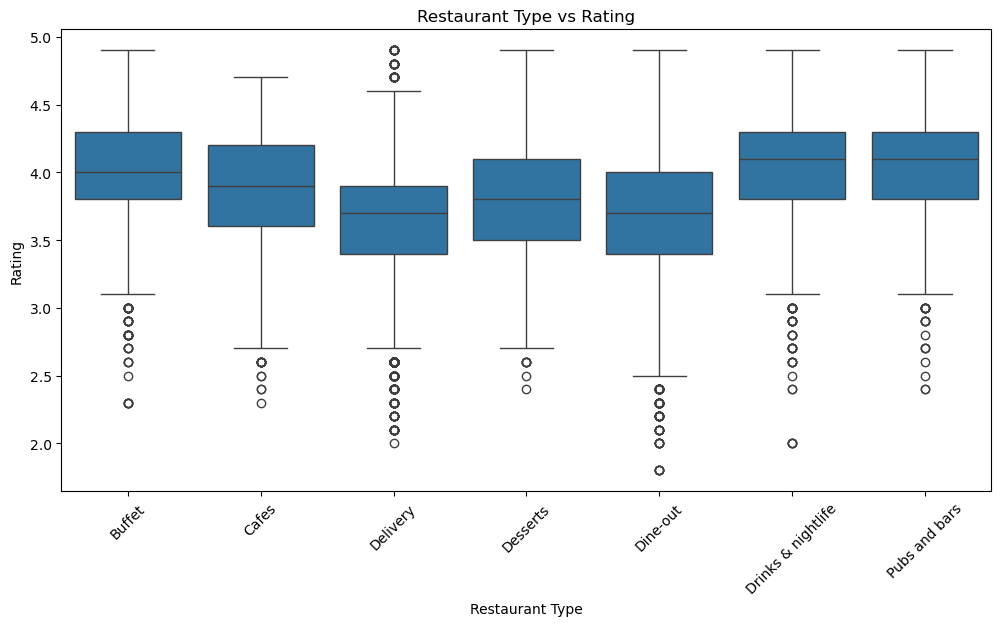

In [103]:
plt.figure(figsize=(12,6))
sns.boxplot(x='restaurant_type', y='rate', data=data)
plt.xticks(rotation=45)
plt.title('Restaurant Type vs Rating')
plt.xlabel('Restaurant Type')
plt.ylabel('Rating')
plt.show()

# Cuisine vs Rating


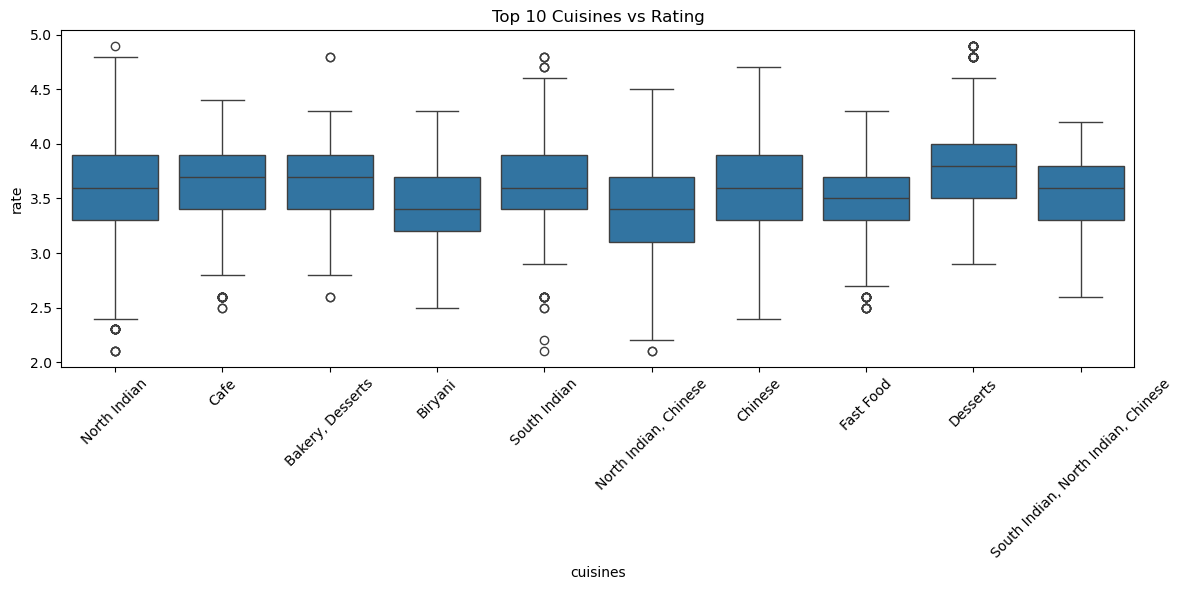

In [107]:
top_cuisines = data['cuisines'].value_counts().head(10).index
df_top_cuisine = data[data['cuisines'].isin(top_cuisines)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='cuisines', y='rate', data=df_top_cuisine)
plt.title('Top 10 Cuisines vs Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("cuisine_vs_rating.png")

# Cost for two

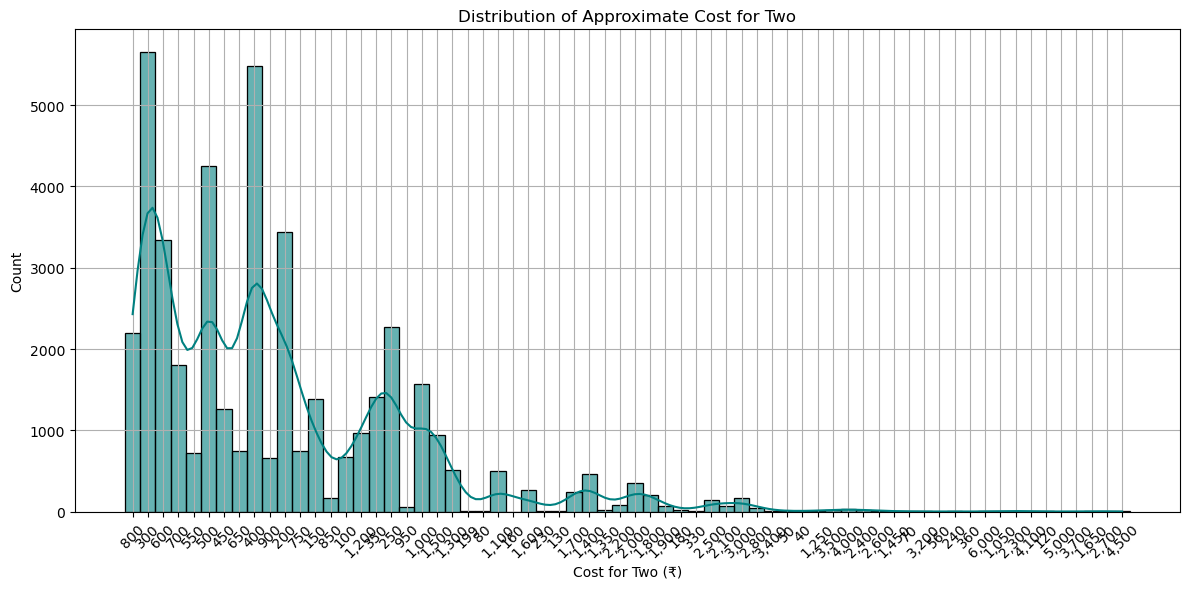

In [120]:
plt.figure(figsize=(12,6))
sns.histplot(data['approxcost_two'], bins=30, kde=True, color='teal',alpha = 0.6)
plt.title('Distribution of Approximate Cost for Two')
plt.xlabel('Cost for Two (₹)')
plt.ylabel('Count')

plt.xticks(rotation=45)  # Rotate for readability
plt.tight_layout()
plt.grid(True)
plt.show()